<a href="https://colab.research.google.com/github/jmparradov/MachineLearning_Project/blob/dev_mauro/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importación de liberías

In [128]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
import os

# Funciones externas
# ==============================================================================

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PrimerSemestre/MachineLearning
from utils.funciones import multiple_plot





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PrimerSemestre/MachineLearning


#2. Funciones

#2. Extracción de datos

In [129]:
url = 'https://raw.githubusercontent.com/jmparradov/MachineLearning_Project/refs/heads/main/datos_ruido_areametropolitana.csv'

df = pd.read_csv(url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66456 entries, 0 to 66455
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   est       66456 non-null  object 
 1   BEL-ALCA  0 non-null      float64
 2   BEL-USBV  5148 non-null   float64
 3   CEN-TRAF  36861 non-null  float64
 4   GIR-BOTJ  54247 non-null  float64
 5   GIR-SOSN  15745 non-null  float64
 6   ITA-ACUA  34312 non-null  float64
 7   ITA-CODI  15164 non-null  float64
 8   ITA-SAMA  35604 non-null  float64
 9   MED-PJIC  17845 non-null  float64
 10  MED-PJIR  29557 non-null  float64
 11  MED-PLMA  13958 non-null  float64
 12  MED-SIAT  50069 non-null  float64
 13  MED-UNFM  0 non-null      float64
 14  MED-ZOOL  39377 non-null  float64
 15  SAB-SEMS  49006 non-null  float64
dtypes: float64(15), object(1)
memory usage: 8.1+ MB


#3. Formato y transformación de los datos

In [127]:
# prompt: find and give format to est column in df "1/1/17 0:00"

df['est'] = pd.to_datetime(df['est'], format='%m/%d/%y %H:%M')

id_vars = ['est']
value_vars = [col for col in df.columns if col not in id_vars]

d = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='location', value_name='noise_values')

# Extraer año, mes, semana del año, día del mes, número de semana, día de la semana y hora
d['year'] = d['est'].dt.year
d['month'] = d['est'].dt.month
d['day_of_month'] = d['est'].dt.day
d['week_number'] = d['est'].dt.isocalendar().week
d['day_of_week'] = d['est'].dt.dayofweek  # 0 = Monday, 6 = Sunday
d['hour'] = d['est'].dt.hour
d['day_month'] = d['est'].dt.strftime('%d-%m')

d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996840 entries, 0 to 996839
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   est           996840 non-null  datetime64[ns]
 1   location      996840 non-null  object        
 2   noise_values  396893 non-null  float64       
 3   year          996840 non-null  int32         
 4   month         996840 non-null  int32         
 5   day_of_month  996840 non-null  int32         
 6   week_number   996840 non-null  UInt32        
 7   day_of_week   996840 non-null  int32         
 8   hour          996840 non-null  int32         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(5), object(1)
memory usage: 46.6+ MB


#4. Limpieza de datos

In [130]:
#Verificación de registros duplicados
d.loc[d.duplicated()]

,est,location,noise_values,year,month,day_of_month,week_number,day_of_week,hour


In [131]:
# eliminación de registros duplicados
d = d.drop_duplicates()

# Remove rows where 'noise_values' is NaN
d = d.dropna(subset=['noise_values'])

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

#5. Visualización de datos

In [132]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,location
0,BEL-USBV
1,BEL-USBV


In [133]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64', 'UInt32']).columns.tolist()
d[numCols].head()

,noise_values,year,month,day_of_month,week_number,day_of_week,hour
0,56.0,2023,11,23,47,3,16
1,53.8,2023,11,23,47,3,17
2,52.9,2023,11,23,47,3,18
3,52.4,2023,11,23,47,3,19
4,51.1,2023,11,23,47,3,20


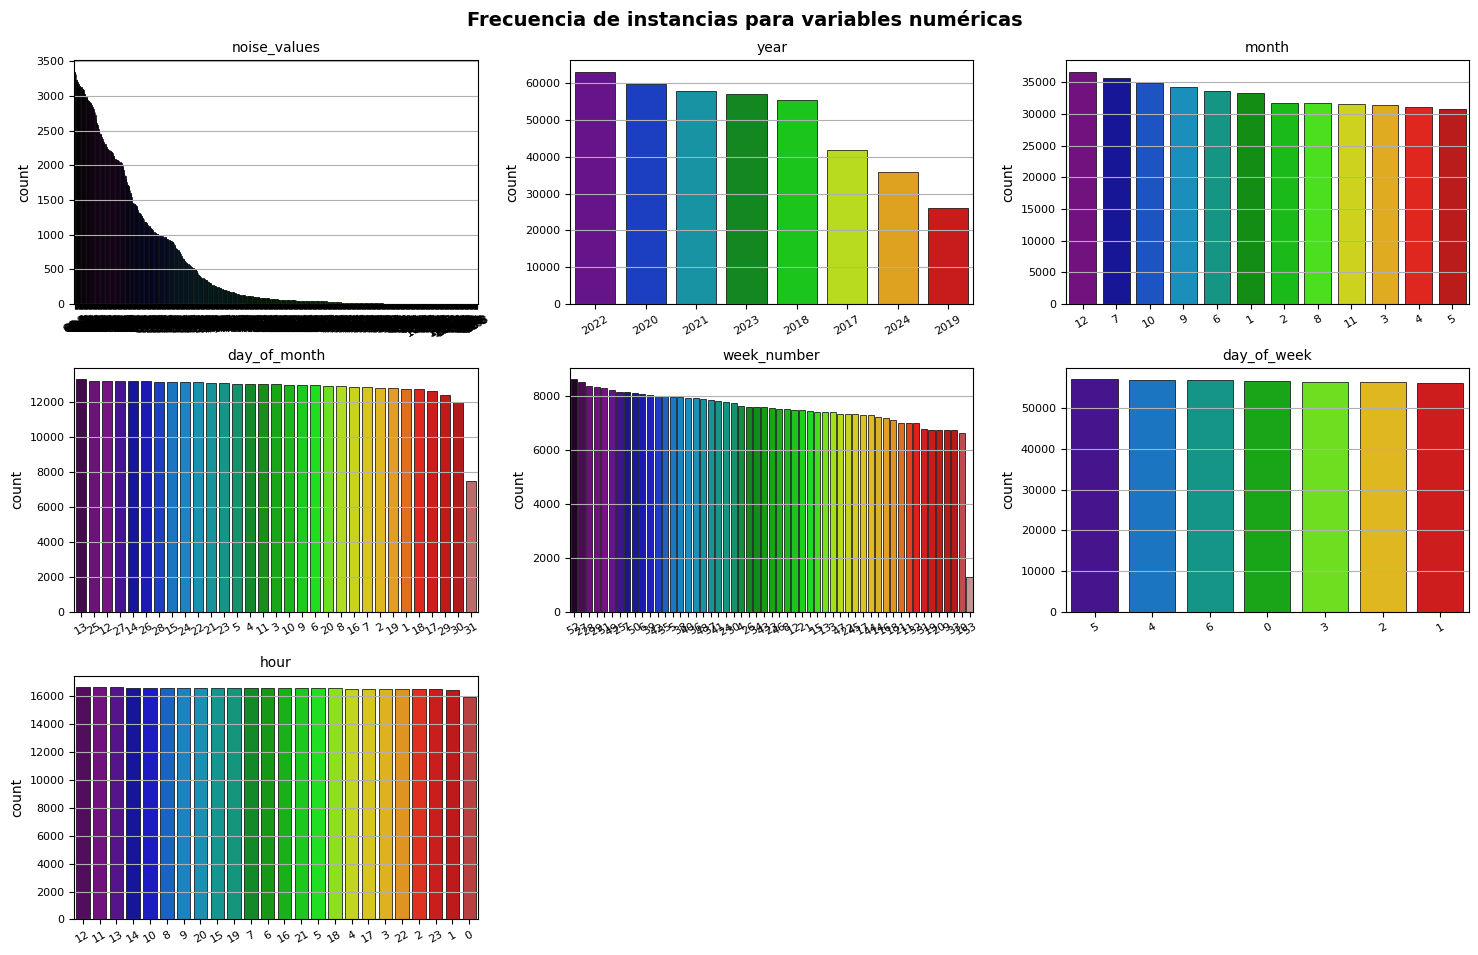

In [134]:
#Visualización de frecuencia de instancias para variables numéricas
multiple_plot(3, d , numCols, None, 'countplot', 'Frecuencia de instancias para variables numéricas',30)

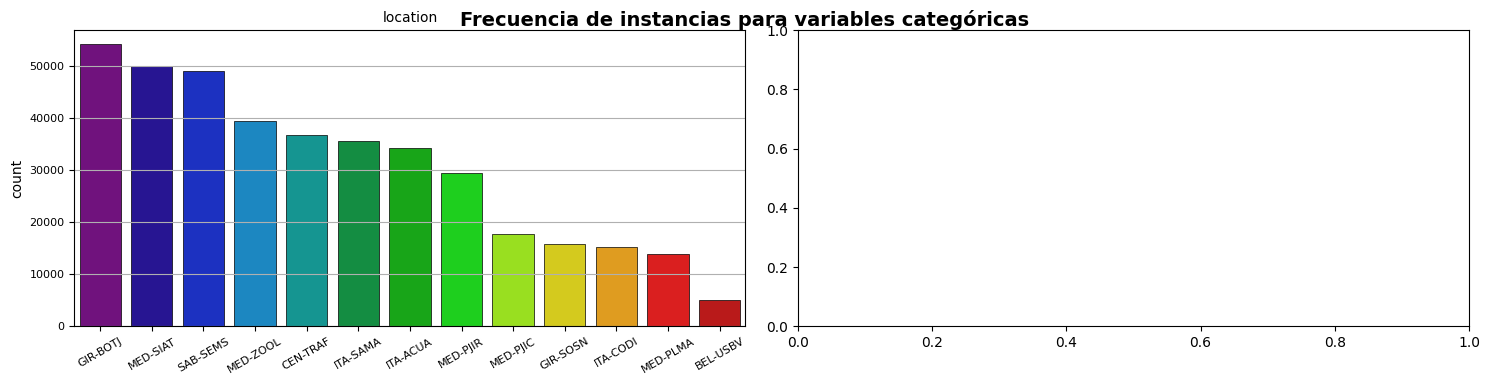

In [135]:
# Visualización de frencuencia de instancias para variables categóricas
multiple_plot(2, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [136]:
# Filtrar los datos para dejar los años de interés 2021-2023, y evitar información dentro del rango del COVID y el presente año
d = d[(d['year'] >= 2021) & (d['year'] <= 2023)]

# Print the filtered DataFrame
print(d)

                       est  location  noise_values  year  month  day_of_month  \
0      2023-11-23 16:00:00  BEL-USBV          56.0  2023     11            23   
1      2023-11-23 17:00:00  BEL-USBV          53.8  2023     11            23   
2      2023-11-23 18:00:00  BEL-USBV          52.9  2023     11            23   
3      2023-11-23 19:00:00  BEL-USBV          52.4  2023     11            23   
4      2023-11-23 20:00:00  BEL-USBV          51.1  2023     11            23   
...                    ...       ...           ...   ...    ...           ...   
392299 2023-12-31 19:00:00  SAB-SEMS          65.8  2023     12            31   
392300 2023-12-31 20:00:00  SAB-SEMS          66.6  2023     12            31   
392301 2023-12-31 21:00:00  SAB-SEMS          66.8  2023     12            31   
392302 2023-12-31 22:00:00  SAB-SEMS          68.3  2023     12            31   
392303 2023-12-31 23:00:00  SAB-SEMS          67.4  2023     12            31   

        week_number  day_of

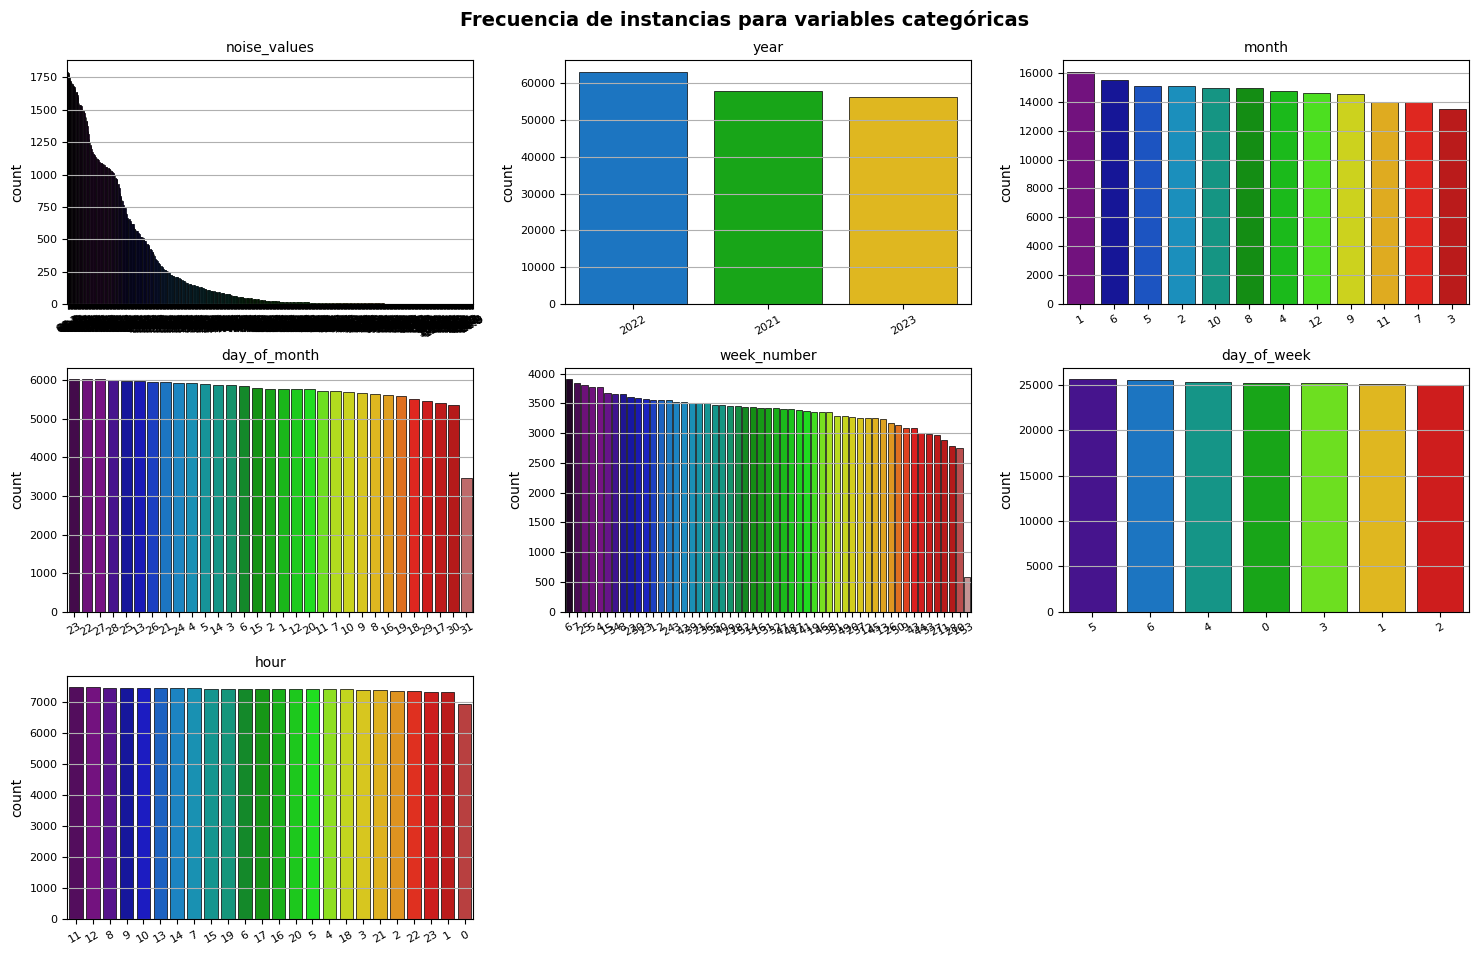

In [137]:
# Removiendo los datos para BEL-USBV
d = d[d.location != 'BEL-USBV']

# Visualización de frencuencia de instancias para variables categóricas
multiple_plot(3, d , numCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

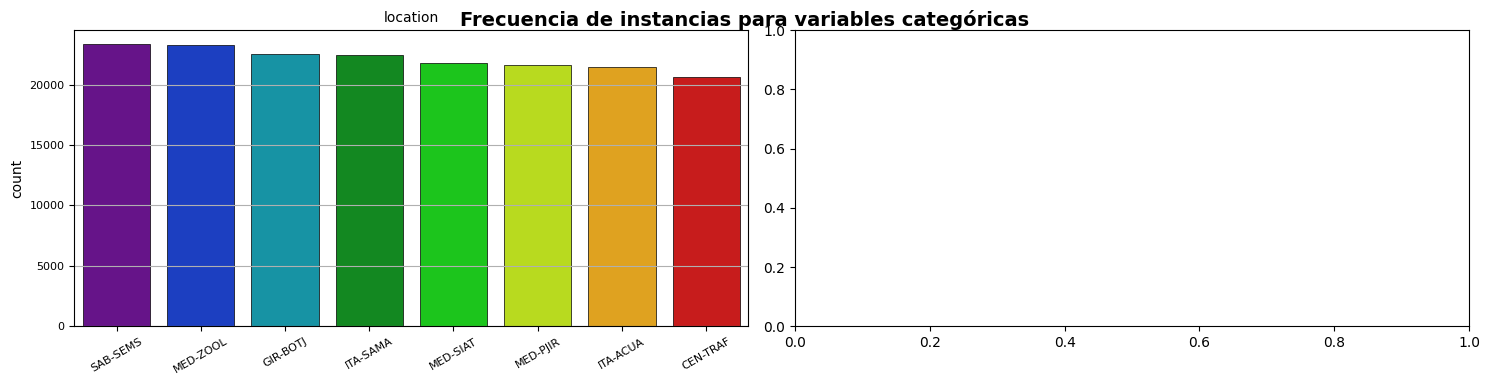

In [139]:
# Visualización de frencuencia de instancias para variables categóricas
multiple_plot(2, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

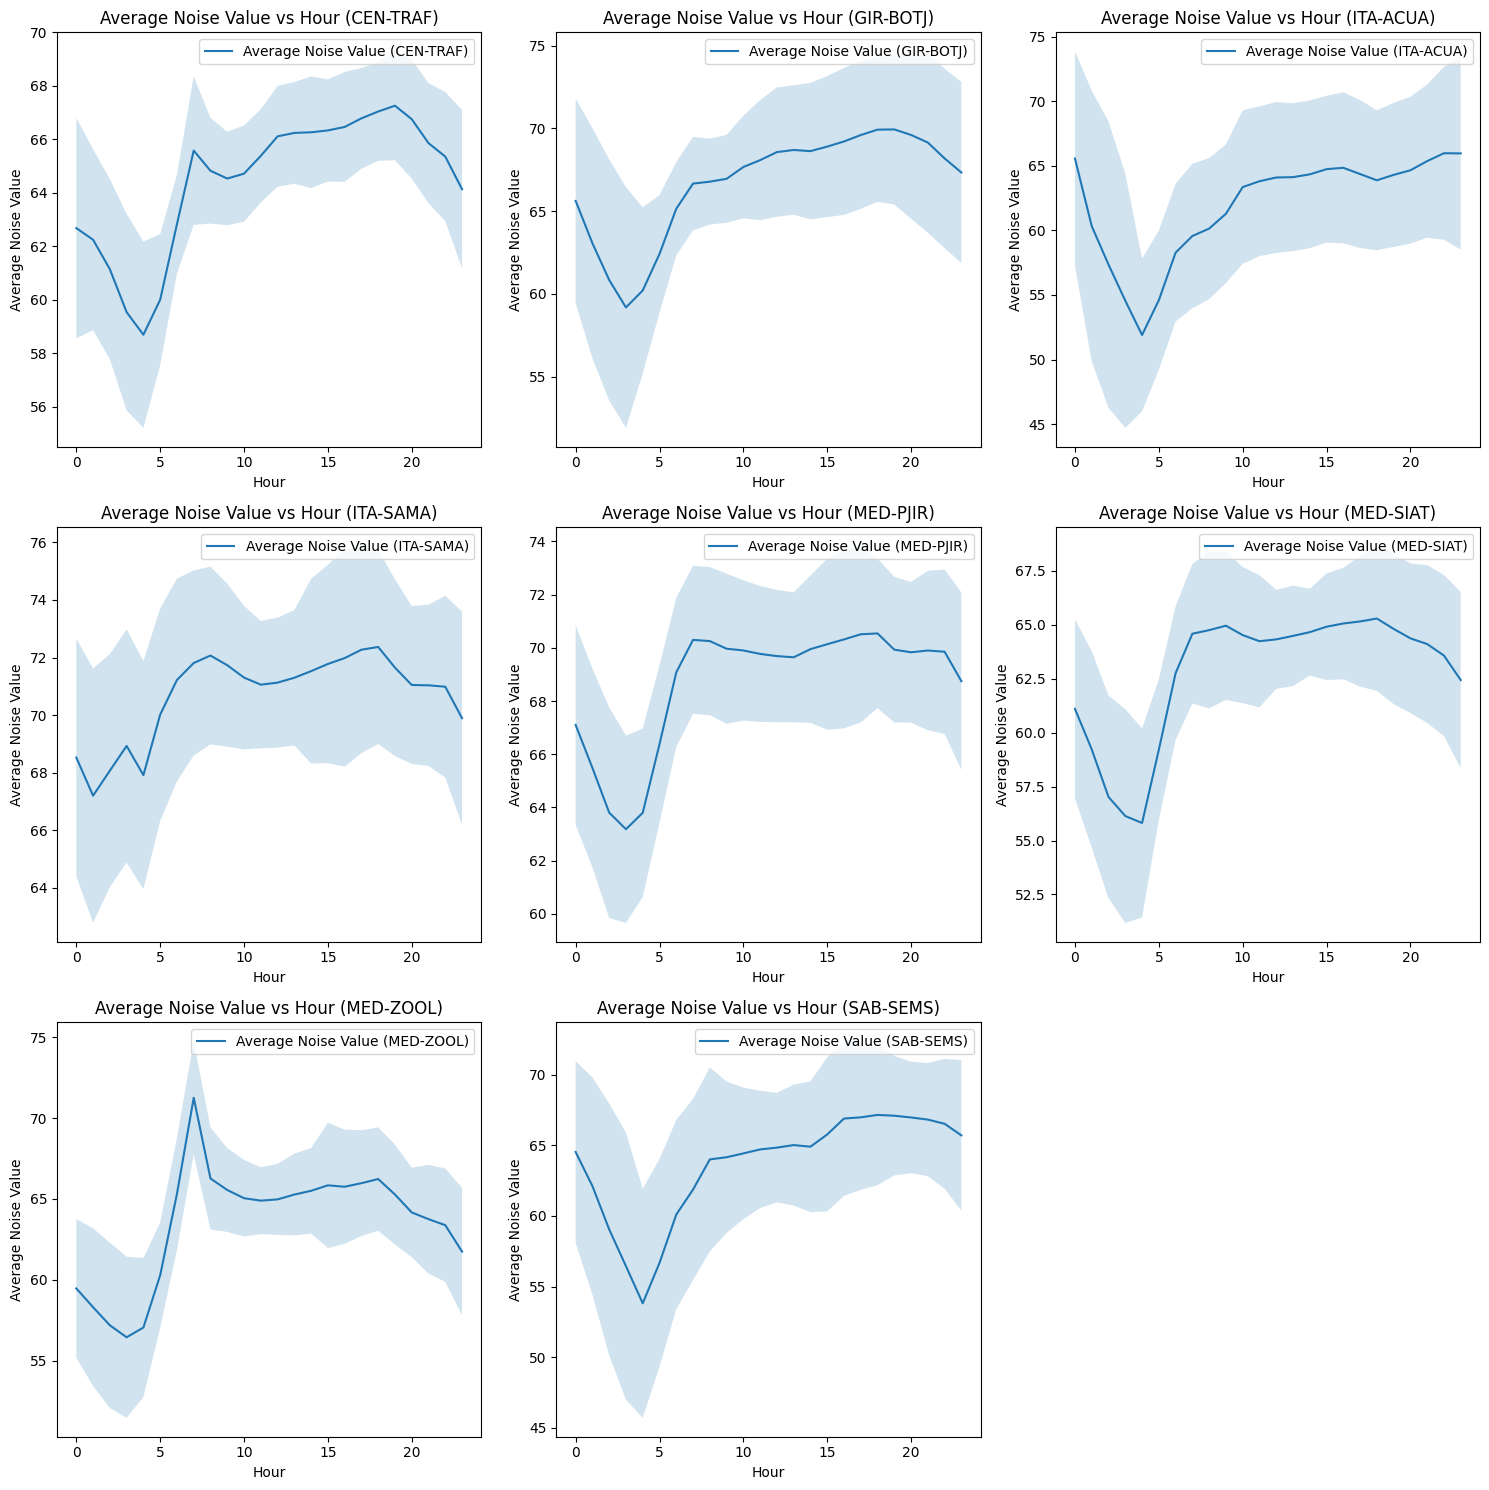

In [138]:
# prompt: plot the average noise_value vs est by hour, generate subplots for each location, include the veriance as a area surounding the average value, plot with 3 subplots by row

# Group by location, hour, and calculate the mean and standard deviation of noise_value
grouped_data = d.groupby(['location', 'hour'])['noise_values'].agg(['mean', 'std'])

# Reset the index to make location and hour regular columns
grouped_data = grouped_data.reset_index()

# Create subplots for each location
num_locations = len(grouped_data['location'].unique())
rows = (num_locations + 2) // 3  # Calculate the number of rows needed for 3 subplots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration


for i, location in enumerate(grouped_data['location'].unique()):
  location_data = grouped_data[grouped_data['location'] == location]
  ax = axes[i]

  # Plot the average noise_value vs hour
  ax.plot(location_data['hour'], location_data['mean'], label=f'Average Noise Value ({location})')

  # Fill the area around the average with the standard deviation
  ax.fill_between(location_data['hour'], location_data['mean'] - location_data['std'],
                  location_data['mean'] + location_data['std'], alpha=0.2)

  ax.set_xlabel('Hour')
  ax.set_ylabel('Average Noise Value')
  ax.set_title(f'Average Noise Value vs Hour ({location})')
  ax.legend()


# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

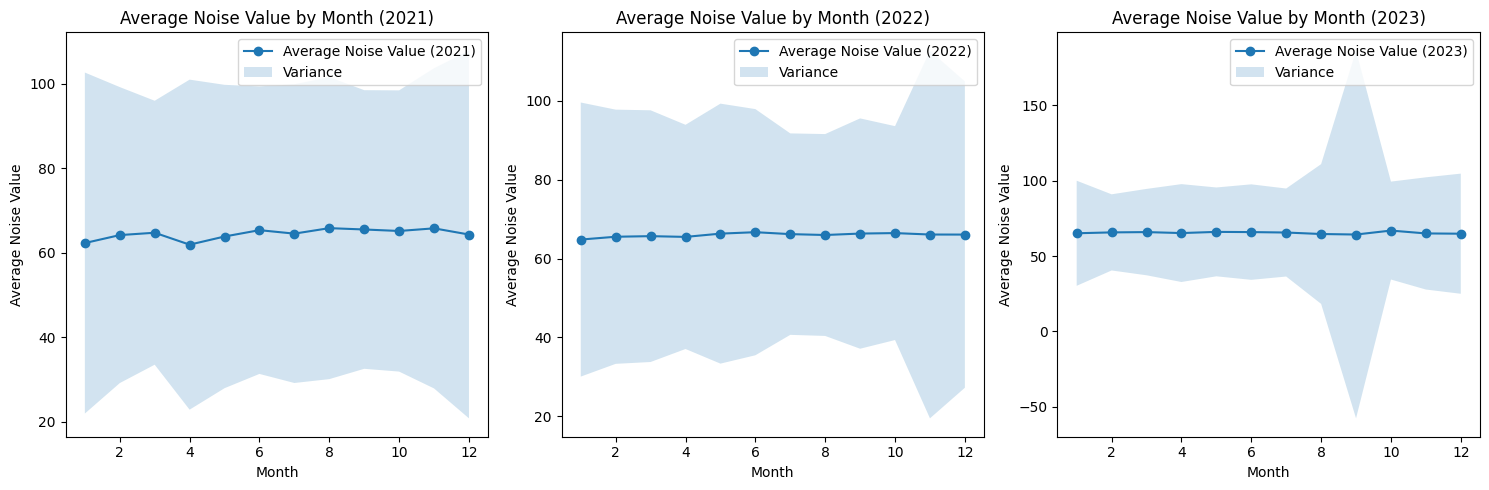

In [145]:
# prompt: plot avergae nouse_value by  month using a year as each subplot, in a row of subplots, include variance as a area surouding the average value

import matplotlib.pyplot as plt

# Assuming 'd' is your DataFrame
# Group by year, month, and calculate the average noise_value
average_noise_by_month = d.groupby(['year', 'month'])['noise_values'].mean().unstack()

# Calculate the variance for each year and month
variance_noise_by_month = d.groupby(['year', 'month'])['noise_values'].var().unstack()

# Create subplots for each year
fig, axes = plt.subplots(1, len(average_noise_by_month.index), figsize=(15, 5))

for i, year in enumerate(average_noise_by_month.index):
  ax = axes[i]

  # Plot the average noise_value for each month
  ax.plot(average_noise_by_month.columns, average_noise_by_month.loc[year], marker='o', label=f'Average Noise Value ({year})')

  # Fill the area around the average with the variance
  ax.fill_between(average_noise_by_month.columns,
                  average_noise_by_month.loc[year] - variance_noise_by_month.loc[year],
                  average_noise_by_month.loc[year] + variance_noise_by_month.loc[year],
                  alpha=0.2, label='Variance')

  ax.set_xlabel('Month')
  ax.set_ylabel('Average Noise Value')
  ax.set_title(f'Average Noise Value by Month ({year})')
  ax.legend()

plt.tight_layout()
plt.show()
